<a href="https://colab.research.google.com/github/among5094/SWMilitaryAcademy/blob/main/0627(%ED%99%94)_pandasReview%EC%88%98%EC%97%85%EB%B3%B5%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# pandas 리뷰
## 1. pandas의 이해
### 1) DataFrame
표형식의 데이터를 담는 데이터 컨테이너
- 2darray + schema
- df.values + [df.index + df.columns + df.dtypes]
- 열(컬럼) 별로 dtype이 다를 수 있다.
- array는 행별로 데이터 연속, DataFrame은 열별로 데이터 연속
- df.columns: 열 이름
- df.index: 행 이름
- 통계량 쉽게 산출해 준다. -> df.describe()
- plot 메소드를 이용하여 쉽게 시각화할 수 있다.

파이썬의 객체에 대해
https://www.w3schools.com/python/python_classes.asp


In [ ]:
import sklearn
import pandas as pd
import numpy as np

In [ ]:
from sklearn.datasets import load_iris
data = load_iris()
data.keys()#딕셔너리는 key:value 쌍으로 이루어진 데이터 타입이고, 여기서 key값만 뽑고 싶을 때 사용.
#but, 순서는 제멋대로이다. 왜냐? 키-값으로 저장됐을 때부터 순서는 의미 없으니까

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [ ]:
X, y = data.data, data.target
print(data.DESCR)
#변하는 값은 x로, 변하는 값은 y로

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [ ]:
iris = pd.DataFrame(X, columns=data.feature_names)# 열이름만 줬음
iris.head()

#.head()란?
#데이터의 전부를 보여주지 않고 상단부분만 보여줌. 반대로 tail()이 있다. 데이터의 하단부분만 보여줌

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
type(iris)

pandas.core.frame.DataFrame

pandas에서 dtype = 'object'는 일반적으로 문자열을 나타낸다.

In [ ]:
iris.columns #d열이름

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

In [ ]:
iris.index

RangeIndex(start=0, stop=150, step=1)

In [ ]:
np.all(iris.values == data.data) #반대되는 것 np.nall

True

In [ ]:
iris.shape #차원확인, 전체 데이터는 150*4=600개

(150, 4)

In [ ]:
iris.ndim#ndim: 배열의 차원 수, 배열의 축 수

2

In [ ]:
# 150 x 4
iris.size

600

In [ ]:
iris.count() #비결측지의 수를 리턴함

sepal length (cm)    150
sepal width (cm)     150
petal length (cm)    150
petal width (cm)     150
dtype: int64

In [ ]:
data.data.dtype, data.target.dtype, iris.dtypes

(dtype('float64'),
 dtype('int64'),
 sepal length (cm)    float64
 sepal width (cm)     float64
 petal length (cm)    float64
 petal width (cm)     float64
 dtype: object)

In [ ]:
iris['Species'] = data.target
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
iris.dtypes

sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
Species                int64
dtype: object

[Quiz] iris.Species의 숫자값을 data.target_names의 값으로 바꾸어보자.
- tip : Series의 map 메소드를 활용한다.

In [ ]:
iris.Species

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species, Length: 150, dtype: int64

In [ ]:
mapper = {}
for i, sp in enumerate(data.target_names):
    mapper[i] = sp
mapper

{0: 'setosa', 1: 'versicolor', 2: 'virginica'}

In [ ]:
iris.Species.map(mapper) #0이 setosa, 1은 versicolor, 2은 virginica로
iris.Species.map(lambda i: mapper[i])

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: Species, Length: 150, dtype: object

In [ ]:
mapper = lambda x: data.target_names[x] #얘가 더 효율적임. 2번째 셀 위에 있는건 메모리를 쓰는 것이기 때문
iris.Species.map(mapper)

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: Species, Length: 150, dtype: object

In [ ]:
data.target_names[2]

'virginica'

python bulid-in function map:

In [ ]:
ls = [1, 2, 3]

In [ ]:
sq = lambda x: x**2
list(map(sq, ls))

[1, 4, 9]

### 1) 기초 탐색적데이터분석(EDA) 기능

In [ ]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   Species            150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [ ]:
iris.describe() #연속된 변수에 대해서

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


[Quiz] 변수별 IQR(Q3 - Q1) 을 계산하여 출력해보자.
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>

In [ ]:
irisStat = iris.describe()
irisStat.values[6] - irisStat.values[4]

array([1.3, 0.5, 3.5, 1.5, 2. ])

In [ ]:
irisIQR = pd.Series(irisStat.values[6] - irisStat.values[4], index=irisStat.columns) #6번째 행에서 4번째 행을 뺀
irisIQR

sepal length (cm)    1.3
sepal width (cm)     0.5
petal length (cm)    3.5
petal width (cm)     1.5
Species              2.0
dtype: float64

In [ ]:
irisIQR = irisStat.iloc[6] - irisStat.iloc[4]
irisIQR

sepal length (cm)    1.3
sepal width (cm)     0.5
petal length (cm)    3.5
petal width (cm)     1.5
Species              2.0
dtype: float64

In [ ]:
irisIQR = irisStat.loc['75%'] - irisStat.loc['25%']
irisIQR

sepal length (cm)    1.3
sepal width (cm)     0.5
petal length (cm)    3.5
petal width (cm)     1.5
Species              2.0
dtype: float64

In [ ]:
irisStats = irisStat.append(irisIQR, ignore_index=True)
idx = list(irisStat.index) + ['IQR']
irisStats.index = idx
irisStats

<ipython-input-435-d1355a33b8c8>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  irisStats = irisStat.append(irisIQR, ignore_index=True)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000
IQR,1.300000,0.500000,3.500000,1.500000,2.000000


In [ ]:
irisIQR = irisStat.loc['75%'] - irisStat.loc['25%']
irisIQR.name = 'IQR'
irisStats = irisStat.append(irisIQR)
irisStats

<ipython-input-436-5b5d2eba15a9>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  irisStats = irisStat.append(irisIQR)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000
IQR,1.300000,0.500000,3.500000,1.500000,2.000000


### 2) Series의 이해
DataFrame의 하나의 열 = 1darray + index
- DataFrame = index를 공유하는 Series 들

> DataFrame = 2darray + schema

In [ ]:
iris.columns = ['sl', 'sw', 'pl', 'pw', 'species']
iris.head()

,sl,sw,pl,pw,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
type(iris.sl)

pandas.core.series.Series

In [ ]:
iris.sl.index

RangeIndex(start=0, stop=150, step=1)

In [ ]:
iris.index #DataFrame인 iris index와 같다.

RangeIndex(start=0, stop=150, step=1)

In [ ]:
iris.values.shape

(150, 5)

In [ ]:
iris.sw.values.shape

(150,)

In [ ]:
iris.sw.values

array([3.5, 3. , 3.2, 3.1, 3.6, 3.9, 3.4, 3.4, 2.9, 3.1, 3.7, 3.4, 3. ,
       3. , 4. , 4.4, 3.9, 3.5, 3.8, 3.8, 3.4, 3.7, 3.6, 3.3, 3.4, 3. ,
       3.4, 3.5, 3.4, 3.2, 3.1, 3.4, 4.1, 4.2, 3.1, 3.2, 3.5, 3.6, 3. ,
       3.4, 3.5, 2.3, 3.2, 3.5, 3.8, 3. , 3.8, 3.2, 3.7, 3.3, 3.2, 3.2,
       3.1, 2.3, 2.8, 2.8, 3.3, 2.4, 2.9, 2.7, 2. , 3. , 2.2, 2.9, 2.9,
       3.1, 3. , 2.7, 2.2, 2.5, 3.2, 2.8, 2.5, 2.8, 2.9, 3. , 2.8, 3. ,
       2.9, 2.6, 2.4, 2.4, 2.7, 2.7, 3. , 3.4, 3.1, 2.3, 3. , 2.5, 2.6,
       3. , 2.6, 2.3, 2.7, 3. , 2.9, 2.9, 2.5, 2.8, 3.3, 2.7, 3. , 2.9,
       3. , 3. , 2.5, 2.9, 2.5, 3.6, 3.2, 2.7, 3. , 2.5, 2.8, 3.2, 3. ,
       3.8, 2.6, 2.2, 3.2, 2.8, 2.8, 2.7, 3.3, 3.2, 2.8, 3. , 2.8, 3. ,
       2.8, 3.8, 2.8, 2.8, 2.6, 3. , 3.4, 3.1, 3. , 3.1, 3.1, 3.1, 2.7,
       3.2, 3.3, 3. , 2.5, 3. , 3.4, 3. ])

In [ ]:
iris.sw.index

RangeIndex(start=0, stop=150, step=1)

## 2. 데이터프레임의 색인
- iloc[start:end] : numpy array 규칙을 따르기 때문에, start는 포함, end는 제외
- loc[start:end] : 이름에 의한 색인을 하기 때문에, **start와 end를 모두 포함.**

[Quiz] iris 데이터에서 100 ~ 110 행과 sl와 pl 만의 열을 색인해보자.
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>

In [ ]:
iris.values[100:110, [0, 2]] #위의 Quiz에 대한 Ans

array([[6.3, 6. ],
       [5.8, 5.1],
       [7.1, 5.9],
       [6.3, 5.6],
       [6.5, 5.8],
       [7.6, 6.6],
       [4.9, 4.5],
       [7.3, 6.3],
       [6.7, 5.8],
       [7.2, 6.1]])

In [ ]:
iris.iloc[100:111, [0,2]]

,sl,pl
100,6.3,6.0
101,5.8,5.1
102,7.1,5.9
103,6.3,5.6
104,6.5,5.8
105,7.6,6.6
106,4.9,4.5
107,7.3,6.3
108,6.7,5.8
109,7.2,6.1


In [ ]:
iris.iloc[100:111, :-1:2] #처음부터 시작해서 -1(맨 끝에거는 빼고, 2(2칸씩 띄어서))

,sl,pl
100,6.3,6.0
101,5.8,5.1
102,7.1,5.9
103,6.3,5.6
104,6.5,5.8
105,7.6,6.6
106,4.9,4.5
107,7.3,6.3
108,6.7,5.8
109,7.2,6.1


In [ ]:
iris.loc[100:110, ['sl', 'pl']]


,sl,pl
100,6.3,6.0
101,5.8,5.1
102,7.1,5.9
103,6.3,5.6
104,6.5,5.8
105,7.6,6.6
106,4.9,4.5
107,7.3,6.3
108,6.7,5.8
109,7.2,6.1


In [ ]:
iris.iloc[100:110, [0, 2]]

,sl,pl
100,6.3,6.0
101,5.8,5.1
102,7.1,5.9
103,6.3,5.6
104,6.5,5.8
105,7.6,6.6
106,4.9,4.5
107,7.3,6.3
108,6.7,5.8
109,7.2,6.1


In [ ]:
iris['sl']

0      5.1
1      4.9
2      4.7
3      4.6
4      5.0
      ... 
145    6.7
146    6.3
147    6.5
148    6.2
149    5.9
Name: sl, Length: 150, dtype: float64

In [ ]:
iris.loc[100:110][['sl', 'pl']]

,sl,pl
100,6.3,6.0
101,5.8,5.1
102,7.1,5.9
103,6.3,5.6
104,6.5,5.8
105,7.6,6.6
106,4.9,4.5
107,7.3,6.3
108,6.7,5.8
109,7.2,6.1


list 또는 dict로 DataFrame 생성시:
- list의 한 성분은 DataFrame의 행을 이룬다.
- dict의 한 성분은 DataFrame의 열을 이룬다.

In [ ]:
li = [[1.1, 1.3, 5.2, 7.2],
      [0.5, 2.1, 2.2, 6.1]]
pd.DataFrame(li)

,0,1,2,3
0,1.1,1.3,5.2,7.2
1,0.5,2.1,2.2,6.1


In [ ]:
dt = {'a':[1.1, 1.3, 5.2, 7.2],
      'b':[0.5, 2.1, 2.2, 6.1]}
pd.DataFrame(dt)

,a,b
0,1.1,0.5
1,1.3,2.1
2,5.2,2.2
3,7.2,6.1


In [ ]:
dt = {'a':{'k':1.1, 'm':1.3, 'l':5.2, 'n':7.2},
      'b':{'k':1.2, 'l':3.3, 'm':4.2, 'n':6.2}}
tmp = pd.DataFrame(dt)
tmp

,a,b
k,1.1,1.2
m,1.3,4.2
l,5.2,3.3
n,7.2,6.2


In [ ]:
tmp['k':'k']

,a,b
k,1.1,1.2


In [ ]:
tmp[tmp.a > 2]

,a,b
l,5.2,3.3
n,7.2,6.2


In [ ]:
ar2d = np.arange(25).reshape((5,5))
ar2d

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24]])

In [ ]:
ar2d[[0, 2]]

array([[ 0,  1,  2,  3,  4],
       [10, 11, 12, 13, 14]])

In [ ]:
tmp[['b','a']]

,b,a
k,1.2,1.1
m,4.2,1.3
l,3.3,5.2
n,6.2,7.2


### 1) 데이터 프레임의 직접적인 색인
|구분|점색인|불연색인|연속색인|논리색인|
|---|---|---|---|---|
|대상|열|열|행|행|
|방법|df['열명']|df[['열명1', '열명2', $\cdots$]]|df[s:e:i]|df[bv]|

In [ ]:
#iris[0] #iris의 0번째 열을 가지고 오고 싶을 때 이렇게 하면 오류남, 점색인은
iris[0:1] #이거는 됨

,sl,sw,pl,pw,species
0,5.1,3.5,1.4,0.2,0


In [ ]:
iris.head()

,sl,sw,pl,pw,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
np.all(iris['sl'] == iris.sl) #칼럼은 멤버변수처럼 접근할 수 있다.
#점색인으로 접근할 수도 있고 멤버변수처럼 접근할 수도 있다.

True

연속 색인시 행에 대한 색인을 하는데, 일반적인 색인과 마찬가지로 start는 퐇마하고, end는 포함하지 않는다.

일반적인 색인과 마찬가지로 start는 포함하고, end는 포함하지 않는다.

In [ ]:
iris[1:3]

,sl,sw,pl,pw,species
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


In [ ]:
#현장에서는
tmp[1:3]

,a,b
m,1.3,4.2
l,5.2,3.3


In [ ]:
tmp['m':'n']

,a,b
m,1.3,4.2
l,5.2,3.3
n,7.2,6.2


In [ ]:
try:
    iris[[1, 3]] #불연속색인
except Exception as e:
    print(e)

"None of [Int64Index([1, 3], dtype='int64')] are in the [columns]"


In [ ]:
iris.iloc[[1,3]]

,sl,sw,pl,pw,species
1,4.9,3.0,1.4,0.2,0
3,4.6,3.1,1.5,0.2,0


In [ ]:
iris[['pl', 'sl']]

,pl,sl
0,1.4,5.1
1,1.4,4.9
2,1.3,4.7
3,1.5,4.6
4,1.4,5.0
...,...,...
145,5.2,6.7
146,5.0,6.3
147,5.2,6.5
148,5.4,6.2


In [ ]:
bv = iris.sl < 5
bv.sum()

22

In [ ]:
# iris 데이터 중에서 꽃받침의 길이가 5보다 작은 데이터
iris[bv].shape

(22, 5)

### 2) 순서에 의한 색인
iloc[행순서, 열순서] : 점색인, 연속색인, 불연속색인을 각각 행별로 열별로 이용할 수 있다.

In [ ]:
iris.iloc[100:105, [0, 2]]

,sl,pl
100,6.3,6.0
101,5.8,5.1
102,7.1,5.9
103,6.3,5.6
104,6.5,5.8


In [ ]:
iris.iloc[[100,105], 0:2]

,sl,sw
100,6.3,3.3
105,7.6,3.0


iloc을 쓸 때는 논리색인을 사용할 수 없다. 반면, loc에서는 논리색인을 사용할 수 있다.

In [ ]:
try:
    iris.iloc[bv, [0, 2]]
except Exception as e:
    print(e)

iLocation based boolean indexing on an integer type is not available


### 3) 이름에 의한 색인
loc[행이름, 열이름]: 점색인, 불연속색인, 연속색인, 논리색인까지 사용할 수 있다.
- 연속색인시 start:end로 표기하는 데, end를 포함한다.

In [ ]:
iris.loc[100:105, ['sl', 'pl']]

,sl,pl
100,6.3,6.0
101,5.8,5.1
102,7.1,5.9
103,6.3,5.6
104,6.5,5.8
105,7.6,6.6


In [ ]:
iris.loc[iris.sl < 5, [True, False, True, False, False]]

,sl,pl
1,4.9,1.4
2,4.7,1.3
3,4.6,1.5
6,4.6,1.4
8,4.4,1.4
9,4.9,1.5
11,4.8,1.6
12,4.8,1.4
13,4.3,1.1
22,4.6,1.0


### 4) Series에 대한 색인

In [ ]:
sl = iris.sl
sl.head()

0    5.1
1    4.9
2    4.7
3    4.6
4    5.0
Name: sl, dtype: float64

In [ ]:
sl[:4]

0    5.1
1    4.9
2    4.7
3    4.6
Name: sl, dtype: float64

In [ ]:
sl.loc[:4] #4를 포함하는 연속색인 가능, 이름에 의한 연속색인은 포함

0    5.1
1    4.9
2    4.7
3    4.6
4    5.0
Name: sl, dtype: float64

In [ ]:
sl[[0, 5]] #0번째와 5번째 데이터 가지고오기

0    5.1
5    5.4
Name: sl, dtype: float64

In [ ]:
sl[sl < 5]

1      4.9
2      4.7
3      4.6
6      4.6
8      4.4
9      4.9
11     4.8
12     4.8
13     4.3
22     4.6
24     4.8
29     4.7
30     4.8
34     4.9
37     4.9
38     4.4
41     4.5
42     4.4
45     4.8
47     4.6
57     4.9
106    4.9
Name: sl, dtype: float64

In [ ]:
iris.sl > 5.

0       True
1      False
2      False
3      False
4      False
       ...  
145     True
146     True
147     True
148     True
149     True
Name: sl, Length: 150, dtype: bool

In [ ]:
iris.pl[iris.sl > 5.]

0      1.4
5      1.7
10     1.5
14     1.2
15     1.5
      ... 
145    5.2
146    5.0
147    5.2
148    5.4
149    5.1
Name: pl, Length: 118, dtype: float64

## 3. DataFrame 생성
### 1) python container로 생성하기
입력 데이터로 array, dict, list 등을 사용할 수 있다.

In [ ]:
iris = pd.DataFrame(data.data)
iris.head()

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
iris.columns = ['sl', 'sw', 'pl', 'pw']
iris.columns

Index(['sl', 'sw', 'pl', 'pw'], dtype='object')

In [ ]:
iris.index

RangeIndex(start=0, stop=150, step=1)

In [ ]:
iris['species'] = data.target
iris.head()

,sl,sw,pl,pw,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
names = ['홍', '김', '박', '이']
ages = np.array([23, 12, 17, 31])
scores = (56, 72, 83, 45)

DataFrame 인자로 사전(dict)이 들어가면, key가 column명이 되고, value가 열 데이터가 된다.

In [ ]:
studs = pd.DataFrame({'name':names, 'age':ages, 'score':scores})
studs.head()

,name,age,score
0,홍,23,56
1,김,12,72
2,박,17,83
3,이,31,45


DataFrame 인자로 리스트(list)이 들어가면, 리스트의 각 성분은 행이된다.

In [ ]:
records = [['홍', 23, 58],
           ['김', 15, 78],
           ['이', 27, 85],
           ['박', 31, 46]]
records

[['홍', 23, 58], ['김', 15, 78], ['이', 27, 85], ['박', 31, 46]]

In [ ]:
tmp = pd.DataFrame(records).set_index(0)
tmp
#밑의 결과에 0은 index의 이름이 된다

,1,2
0,,
홍,23,58
김,15,78
이,27,85
박,31,46


In [ ]:
records = [['a', '홍', 23, 58],
           ['b', '김', 15, 78],
           ['c', '이', 27, 85],
           ['d', '박', 31, 46]]
records

[['a', '홍', 23, 58],
 ['b', '김', 15, 78],
 ['c', '이', 27, 85],
 ['d', '박', 31, 46]]

In [ ]:
tmp = pd.DataFrame(records).set_index(0)
tmp

,1,2,3
0,,,
a,홍,23,58
b,김,15,78
c,이,27,85
d,박,31,46


In [ ]:
tmp.loc['a':'c', 1:]

,1,2,3
0,,,
a,홍,23,58
b,김,15,78
c,이,27,85


### 2) 텍스트 파일로 생성

In [ ]:
features = ["Age", "Workclass", "fnlwgt", "Education", "Education-Num", "Martial Status",
        "Occupation", "Relationship", "Race", "Sex", "Capital Gain", "Capital Loss",
        "Hours per week", "Country", "Target"]

train_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'
test_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test'

In [ ]:
text = text.replace("W " , "")
text = text.replace("Wn" , "") #줄넘김 제거


NameError: ignored

In [ ]:
#adult라는 DataFrame만듦
adult = pd.read_csv(train_url, names=features)
adult.head()

,Age,Workclass,fnlwgt,Education,Education-Num,Martial Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country,Target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
adult.info() #여기에는 결측Data가 하나도 없다.
# 인종 성별 나이 등등으로 수익 예측하는 Data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32561 non-null  int64 
 1   Workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   Education       32561 non-null  object
 4   Education-Num   32561 non-null  int64 
 5   Martial Status  32561 non-null  object
 6   Occupation      32561 non-null  object
 7   Relationship    32561 non-null  object
 8   Race            32561 non-null  object
 9   Sex             32561 non-null  object
 10  Capital Gain    32561 non-null  int64 
 11  Capital Loss    32561 non-null  int64 
 12  Hours per week  32561 non-null  int64 
 13  Country         32561 non-null  object
 14  Target          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [ ]:
adult.describe()

,Age,fnlwgt,Education-Num,Capital Gain,Capital Loss,Hours per week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


## 4. DataFrame을 이용한 연산
### 1) 다양한 통계 메소드
numpy, scipy, statmodels에서 제공하는 numpy 연산 함수 - universal 함수를 사용할 수 있다.

In [ ]:
iris

,sl,sw,pl,pw,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [ ]:
iris.mean()

sl         5.843333
sw         3.057333
pl         3.758000
pw         1.199333
species    1.000000
dtype: float64

In [ ]:
iris.std()

sl         0.828066
sw         0.435866
pl         1.765298
pw         0.762238
species    0.819232
dtype: float64

In [ ]:
np.std(iris)

sl         0.825301
sw         0.434411
pl         1.759404
pw         0.759693
species    0.816497
dtype: float64

In [ ]:
iris.agg(np.mean)

sl         5.843333
sw         3.057333
pl         3.758000
pw         1.199333
species    1.000000
dtype: float64

In [ ]:
iris.agg('mean')

sl         5.843333
sw         3.057333
pl         3.758000
pw         1.199333
species    1.000000
dtype: float64

In [ ]:
iris.agg(['mean', 'std'])

,sl,sw,pl,pw,species
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232


In [ ]:
iris.agg({'sl':['mean', 'std'], 'sw':['max', 'min']}) #특정한 다른 변수를 사용하고 싶으면 Dicstional

,sl,sw
mean,5.843333,NaN
std,0.828066,NaN
max,NaN,4.4
min,NaN,2.0


scipy의 iqr 함수의 axis 기본값이 -1이 아닌, None이라서, array 전체에 걸쳐서 연산을 수행하므로, 다른 함수들과 같이 사용할 경우, axis의 기본값 문제로 에러가 발생한다.
- 이때 아래와 같이 axis의 기본값을 수정한 함수를 적용하여 문제를 해결할 수 있다.

In [ ]:
from scipy.stats import iqr
iris.agg(iqr)

sl         1.3
sw         0.5
pl         3.5
pw         1.5
species    2.0
dtype: float64

In [ ]:
iqr(iris, 0)

array([1.3, 0.5, 3.5, 1.5, 2. ])

In [ ]:
from scipy.stats import iqr #사이파이의 iqr
def IQR(x): return iqr(x, axis=-1)
iris.agg({'sl':['mean', np.std], 'sw':[IQR,  np.min]})

,sl,sw
mean,5.843333,NaN
std,0.828066,NaN
IQR,NaN,0.5
amin,NaN,2.0


In [ ]:
# 범주형 데이터에 대한 빈도 테이블
iris.species.value_counts()
# 0=setosa, 1=versicolor, 2=virginica

0    50
1    50
2    50
Name: species, dtype: int64

In [ ]:
# 꽃받침에 너비와 길이의 비율
iris['sRate'] = iris.sw / iris.sl
iris.head()

,sl,sw,pl,pw,species,sRate
0,5.1,3.5,1.4,0.2,0,0.686275
1,4.9,3.0,1.4,0.2,0,0.612245
2,4.7,3.2,1.3,0.2,0,0.680851
3,4.6,3.1,1.5,0.2,0,0.673913
4,5.0,3.6,1.4,0.2,0,0.720000


species를 종별 문자열값으로 변경하고 싶다.

In [ ]:
iris.species

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: species, Length: 150, dtype: int64

In [ ]:
data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [ ]:
mapper = {}
for (i, name) in zip(range(3), data.target_names):
    mapper[i] = name
mapper

{0: 'setosa', 1: 'versicolor', 2: 'virginica'}

In [ ]:
# dictionary comprehension
mapper = {i:name for (i, name) in zip(range(3), data.target_names)}
mapper

{0: 'setosa', 1: 'versicolor', 2: 'virginica'}

In [ ]:
iris.species = iris.species.map(mapper)

In [ ]:
iris.head()

,sl,sw,pl,pw,species,sRate
0,5.1,3.5,1.4,0.2,setosa,0.686275
1,4.9,3.0,1.4,0.2,setosa,0.612245
2,4.7,3.2,1.3,0.2,setosa,0.680851
3,4.6,3.1,1.5,0.2,setosa,0.673913
4,5.0,3.6,1.4,0.2,setosa,0.720000


In [ ]:
iris.sRate = iris.sRate.map(lambda x: np.around(x, 2)) #around는 반올림
iris.head()

,sl,sw,pl,pw,species,sRate
0,5.1,3.5,1.4,0.2,setosa,0.69
1,4.9,3.0,1.4,0.2,setosa,0.61
2,4.7,3.2,1.3,0.2,setosa,0.68
3,4.6,3.1,1.5,0.2,setosa,0.67
4,5.0,3.6,1.4,0.2,setosa,0.72


In [ ]:
iris.sRate = np.around(iris.sRate, 2)
iris.head()

,sl,sw,pl,pw,species,sRate
0,5.1,3.5,1.4,0.2,setosa,0.69
1,4.9,3.0,1.4,0.2,setosa,0.61
2,4.7,3.2,1.3,0.2,setosa,0.68
3,4.6,3.1,1.5,0.2,setosa,0.67
4,5.0,3.6,1.4,0.2,setosa,0.72


In [ ]:
data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

[Quiz] species에 있는 문자열이 너무 길어서, 첫 3개의 문자열만 담고, 이를 대문자로 표기하고자 한다. 이를 수행해보자. (문자열이 너무 길면 용량을 많이 차지하니까)
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>

In [ ]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   sl       150 non-null    float64
 1   sw       150 non-null    float64
 2   pl       150 non-null    float64
 3   pw       150 non-null    float64
 4   species  150 non-null    object 
 5   sRate    150 non-null    float64
dtypes: float64(5), object(1)
memory usage: 7.2+ KB


In [ ]:
chars = 'setosa'

In [ ]:
chars.upper()[:3] #

'SET'

In [ ]:
iris.species.str.upper().str[:3] #species 문자열

0      SET
1      SET
2      SET
3      SET
4      SET
      ... 
145    VIR
146    VIR
147    VIR
148    VIR
149    VIR
Name: species, Length: 150, dtype: object

In [ ]:
# Series의 map 함수는 각 성분에 인자로 지정된 함수를 적용하여 변환시킨다.
iris.species.str.upper().map(lambda x: x[:3])

0      SET
1      SET
2      SET
3      SET
4      SET
      ... 
145    VIR
146    VIR
147    VIR
148    VIR
149    VIR
Name: species, Length: 150, dtype: object

In [ ]:
iris.species.map(lambda x: x[:3].upper()) #<-추천
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   sl       150 non-null    float64
 1   sw       150 non-null    float64
 2   pl       150 non-null    float64
 3   pw       150 non-null    float64
 4   species  150 non-null    object 
 5   sRate    150 non-null    float64
dtypes: float64(5), object(1)
memory usage: 7.2+ KB


### 2) 다양한 데이터 변환 방법

In [ ]:
adult.head()

,Age,Workclass,fnlwgt,Education,Education-Num,Martial Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country,Target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
adult.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32561 non-null  int64 
 1   Workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   Education       32561 non-null  object
 4   Education-Num   32561 non-null  int64 
 5   Martial Status  32561 non-null  object
 6   Occupation      32561 non-null  object
 7   Relationship    32561 non-null  object
 8   Race            32561 non-null  object
 9   Sex             32561 non-null  object
 10  Capital Gain    32561 non-null  int64 
 11  Capital Loss    32561 non-null  int64 
 12  Hours per week  32561 non-null  int64 
 13  Country         32561 non-null  object
 14  Target          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


[Quiz] Education, Education-Num 이 중복된 데이터인지 식별해보자.
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>

In [ ]:
eduVal = adult.Education.value_counts()
print(f"Education 열의 고유한 값의 수는 {eduVal.size}")
eduVal

Education 열의 고유한 값의 수는 16


 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: Education, dtype: int64

In [ ]:
eduNum = adult["Education-Num"].value_counts()
print(f"Education-Num 열의 고유한 값의 수는 {eduNum.size}")
eduNum

Education-Num 열의 고유한 값의 수는 16


9     10501
10     7291
13     5355
14     1723
11     1382
7      1175
12     1067
6       933
4       646
15      576
5       514
8       433
16      413
3       333
2       168
1        51
Name: Education-Num, dtype: int64

In [ ]:
EduSum = (adult["Education-Num"].astype('str') + adult.Education).value_counts()
print(f"결합한 열의 고유한 값의 수는 {EduSum.size}")
EduSum

결합한 열의 고유한 값의 수는 16


9 HS-grad          10501
10 Some-college     7291
13 Bachelors        5355
14 Masters          1723
11 Assoc-voc        1382
7 11th              1175
12 Assoc-acdm       1067
6 10th               933
4 7th-8th            646
15 Prof-school       576
5 9th                514
8 12th               433
16 Doctorate         413
3 5th-6th            333
2 1st-4th            168
1 Preschool           51
dtype: int64

In [ ]:
eduVal.index.name = 'EduName'
eduVal.reset_index(name='Edu')

,EduName,Edu
0,HS-grad,10501
1,Some-college,7291
2,Bachelors,5355
3,Masters,1723
4,Assoc-voc,1382
5,11th,1175
6,Assoc-acdm,1067
7,10th,933
8,7th-8th,646
9,Prof-school,576


In [ ]:
pd.concat([eduVal.reset_index(name='Edu'),
           eduNum.reset_index(name='EduNum'),
           EduSum.reset_index(name='EduSum')], axis=1)

,EduName,Edu,index,EduNum,index,EduSum
0,HS-grad,10501,9,10501,9 HS-grad,10501
1,Some-college,7291,10,7291,10 Some-college,7291
2,Bachelors,5355,13,5355,13 Bachelors,5355
3,Masters,1723,14,1723,14 Masters,1723
4,Assoc-voc,1382,11,1382,11 Assoc-voc,1382
5,11th,1175,7,1175,7 11th,1175
6,Assoc-acdm,1067,12,1067,12 Assoc-acdm,1067
7,10th,933,6,933,6 10th,933
8,7th-8th,646,4,646,4 7th-8th,646
9,Prof-school,576,15,576,15 Prof-school,576


In [ ]:
adult.drop('Education', axis=1).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32561 non-null  int64 
 1   Workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   Education-Num   32561 non-null  int64 
 4   Martial Status  32561 non-null  object
 5   Occupation      32561 non-null  object
 6   Relationship    32561 non-null  object
 7   Race            32561 non-null  object
 8   Sex             32561 non-null  object
 9   Capital Gain    32561 non-null  int64 
 10  Capital Loss    32561 non-null  int64 
 11  Hours per week  32561 non-null  int64 
 12  Country         32561 non-null  object
 13  Target          32561 non-null  object
dtypes: int64(6), object(8)
memory usage: 3.5+ MB


In [ ]:
# adult.drop('Education', axis=1, inplace=True), #inplace <- 지금 이 자리에서 제거해라.
# adult.head()

pd.Categorical 함수는 범주형 변수를 Categrory 변수로 변환한다:
- 내부적으로는 정수로 표현된다.
- {문자열:정수, ...}, lookup 테이블을 저장해서, 문자열인 것처럼 보여준다.

In [ ]:
adult.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32561 non-null  int64 
 1   Workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   Education       32561 non-null  object
 4   Education-Num   32561 non-null  int64 
 5   Martial Status  32561 non-null  object
 6   Occupation      32561 non-null  object
 7   Relationship    32561 non-null  object
 8   Race            32561 non-null  object
 9   Sex             32561 non-null  object
 10  Capital Gain    32561 non-null  int64 
 11  Capital Loss    32561 non-null  int64 
 12  Hours per week  32561 non-null  int64 
 13  Country         32561 non-null  object
 14  Target          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


문자열 변수를 범주형 변수로 변환:
- head()로 출력하면 아무변화가 없는 것으로 보여지고,
- info()로 출력하면 dtype은 'category'로 바뀌고
- 내부적으로 데이터는 정수형으로 변환되며,
- 정수와 범주의 문자열의 짝은 사전과 같은 lookup 테이블로 저장된다.

In [ ]:
adult.Education = pd.Categorical(adult.Education)

In [ ]:
adult.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Age             32561 non-null  int64   
 1   Workclass       32561 non-null  object  
 2   fnlwgt          32561 non-null  int64   
 3   Education       32561 non-null  category
 4   Education-Num   32561 non-null  int64   
 5   Martial Status  32561 non-null  object  
 6   Occupation      32561 non-null  object  
 7   Relationship    32561 non-null  object  
 8   Race            32561 non-null  object  
 9   Sex             32561 non-null  object  
 10  Capital Gain    32561 non-null  int64   
 11  Capital Loss    32561 non-null  int64   
 12  Hours per week  32561 non-null  int64   
 13  Country         32561 non-null  object  
 14  Target          32561 non-null  object  
dtypes: category(1), int64(6), object(8)
memory usage: 3.5+ MB


문자열 형식의 데이터는 one-hot encoding이 필요한데, 문자열 타입의 열을 한번에 식별하는 것이 필요하다.

In [ ]:
adult.dtypes == 'object'
#머신러닝은 문자열 입력이 불가능하기 때문에 정수타입으로 바꿔야 한다. 근데 이렇게 변환할 때 object가 필요하다


Age               False
Workclass          True
fnlwgt            False
Education         False
Education-Num     False
Martial Status     True
Occupation         True
Relationship       True
Race               True
Sex                True
Capital Gain      False
Capital Loss      False
Hours per week    False
Country            True
Target             True
dtype: bool

In [ ]:
adult.dtypes

Age                  int64
Workclass           object
fnlwgt               int64
Education         category
Education-Num        int64
Martial Status      object
Occupation          object
Relationship        object
Race                object
Sex                 object
Capital Gain         int64
Capital Loss         int64
Hours per week       int64
Country             object
Target              object
dtype: object

In [ ]:
objectCols = adult.dtypes[adult.dtypes == 'object'].index
objectCols

Index(['Workclass', 'Martial Status', 'Occupation', 'Relationship', 'Race',
       'Sex', 'Country', 'Target'],
      dtype='object')

In [ ]:
#문자열을 수치화하는 과정
for colm in objectCols:
    adult[colm] = pd.Categorical(adult[colm])
adult.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Age             32561 non-null  int64   
 1   Workclass       32561 non-null  category
 2   fnlwgt          32561 non-null  int64   
 3   Education       32561 non-null  category
 4   Education-Num   32561 non-null  int64   
 5   Martial Status  32561 non-null  category
 6   Occupation      32561 non-null  category
 7   Relationship    32561 non-null  category
 8   Race            32561 non-null  category
 9   Sex             32561 non-null  category
 10  Capital Gain    32561 non-null  int64   
 11  Capital Loss    32561 non-null  int64   
 12  Hours per week  32561 non-null  int64   
 13  Country         32561 non-null  category
 14  Target          32561 non-null  category
dtypes: category(9), int64(6)
memory usage: 1.8 MB


### 3) 데이터 엿보기(EDA)
#### 범주형 데이터 빈도표

In [ ]:
for colm in objectCols:
    print(colm)
    print(adult[colm].value_counts())
    print("==================")

Workclass
 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64
Martial Status
 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: Martial Status, dtype: int64
Occupation
 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: Occupation, dtype: in

#### 그룹별 빈도표
groupby 메소드를 사용하여 DataFrameGroupBy을 이용해야한다.

In [ ]:
adult.columns

Index(['Age', 'Workclass', 'fnlwgt', 'Education', 'Education-Num',
       'Martial Status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital Gain', 'Capital Loss', 'Hours per week', 'Country', 'Target'],
      dtype='object')

In [ ]:
stg = adult.groupby(['Sex', 'Target']).size()
stg

Sex      Target
 Female   <=50K     9592
          >50K      1179
 Male     <=50K    15128
          >50K      6662
dtype: int64

stack, unstack의 의미는 index를 기준으로 쌓겠다, 안 쌓겠다는 의

In [ ]:
stg.unstack(-1)
#unstack의 의미는 쌓지 않겠다는 의미니까,

Target,<=50K,>50K
Sex,,
Female,9592,1179
Male,15128,6662


MultiIndex에는 level이 있다.

In [ ]:
stg.index

MultiIndex([(' Female', ' <=50K'),
            (' Female',  ' >50K'),
            (  ' Male', ' <=50K'),
            (  ' Male',  ' >50K')],
           names=['Sex', 'Target'])

In [ ]:
stg.index.levels

FrozenList([[' Female', ' Male'], [' <=50K', ' >50K']])

- 0th level: [' Female', ' Male']
- 1th level: [' <=50K', ' >50K']

stack(levels=-1), unstack(levels=-1):
- index(행이름)를 기준으로 쌓을꺼냐, 덜어낼꺼냐를 지정한다.
- 기본 레벨이 -1이므로, 가장 깊은 레벨을 이동시킨다.

In [ ]:
adult.groupby(['Sex', 'Target']).size().unstack()

Target,<=50K,>50K
Sex,,
Female,9592,1179
Male,15128,6662


In [ ]:
tmp = adult.groupby(['Sex', 'Target']).size().unstack() / stg.sum() #이때 sum은 전체 sum에 대한 것
tmp

#행 방향은 여성의 합계, 남성의 합계
#열 방향은 50만달러보다 적게 버는, 많이 버는

#이 표의 해석은 남성중

Target,<=50K,>50K
Sex,,
Female,0.294586,0.036209
Male,0.464605,0.204601


In [ ]:
tmp.sum(1).values.reshape((2,1)) #브로드캐스팅되면 여자의 합으로 나눠야 평균이 나오고 남자의 합으로 나눠야 평균이 나오는데 여자의 평균으로 남여 다 나눠서 평균을 구하면 안되니까 reshape해주기

array([[0.33079451],
       [0.66920549]])

[Quiz] 위 크로스테이블에서 행과 열의 소계를 추가한 데이터프레임을 생성해보자.
<br>
<br>
<br>
<br>
<br>
<br>

In [ ]:
sexTarCT = adult.groupby(['Sex', 'Target']).size().unstack() / stg.sum()
sexTarCT['sums'] = sexTarCT.sum(1)#df에 대한 직접적인 점색은 열 색인
sexTarCT.loc['sums'] = sexTarCT.sum(0) #loc으로 이름에 의한 색인은 ','를 기준으로 앞에 것은 행 색인
sexTarCT

#이렇게 표 만들라고 시킬 때 만들 수 있어야 돼

Target,<=50K,>50K,sums
Sex,,,
Female,0.294586,0.036209,0.330795
Male,0.464605,0.204601,0.669205
sums,0.759190,0.240810,1.000000


In [ ]:
adult.columns

Index(['Age', 'Workclass', 'fnlwgt', 'Education', 'Education-Num',
       'Martial Status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital Gain', 'Capital Loss', 'Hours per week', 'Country', 'Target'],
      dtype='object')

[Quiz] Education, Race, Country에 대해서도 Target과의 교차빈도표(빈도비율)을 작성해보자.

In [ ]:
# tmp.columns.astype('str')

In [ ]:
from IPython.display import display


for col in ['Education', 'Race', 'Country']:
    tmp = adult.groupby([col, 'Target']).size()
    sums = tmp.sum()
    print("======" + col + "======")
    tmp = tmp.unstack() / sums
    tmp['50Rate'] = tmp[' >50K'] / tmp[' <=50K']
    tmp.sort_values('50Rate', ascending=False, inplace=True)
    print(tmp)
    print()

    #이 데이터들을 자세히 보면 Country에 ?는 국적을 알 수 없는 사람

======Education======
Target            <=50K      >50K    50Rate
Education                                  
 Doctorate     0.003286  0.009398  2.859813
 Prof-school   0.004699  0.012991  2.764706
 Masters       0.023464  0.029452  1.255236
 Bachelors     0.096250  0.068210  0.708679
 Assoc-voc     0.031357  0.011087  0.353575
 Assoc-acdm    0.024631  0.008139  0.330424
 Some-college  0.181321  0.042597  0.234925
 HS-grad       0.271060  0.051442  0.189780
 12th          0.012285  0.001013  0.082500
 10th          0.026750  0.001904  0.071183
 7th-8th       0.018611  0.001228  0.066007
 9th           0.014957  0.000829  0.055441
 11th          0.034243  0.001843  0.053812
 5th-6th       0.009736  0.000491  0.050473
 1st-4th       0.004975  0.000184  0.037037
 Preschool     0.001566  0.000000  0.000000

======Race======
Target                  <=50K      >50K    50Rate
Race                                             
 Asian-Pac-Islander  0.023433  0.008476  0.361730
 White            

[Quiz] Race가 'Asian-Pac-Islander'인 경우 어떤 나라가 있을까?
- 인종하고 나라는 무관하다.
- 하나의 나라에 여러 인종이 있다고 가정하고 있으며, 올바른 분석이다.

In [ ]:
adult.Race.unique() #Race는 시리즈들인데 시리즈에 있는 유니크한 값들만 뽑아내는 역할

[' White', ' Black', ' Asian-Pac-Islander', ' Amer-Indian-Eskimo', ' Other']
Categories (5, object): [' Amer-Indian-Eskimo', ' Asian-Pac-Islander', ' Black', ' Other', ' White']

In [ ]:
adult.Country[:10]#국적에 대한...

In [ ]:
adult.loc[adult.Race == ' Asian-Pac-Islander', 'Country'].value_counts()

 United-States                 292
 Philippines                   188
 India                          85
 ?                              83
 South                          77
 China                          73
 Vietnam                        65
 Taiwan                         48
 Japan                          38
 Laos                           18
 Cambodia                       18
 Hong                           17
 Thailand                       16
 Iran                            6
 Germany                         3
 Trinadad&Tobago                 2
 Puerto-Rico                     1
 Poland                          1
 Mexico                          1
 Portugal                        1
 Ireland                         1
 Greece                          1
 Canada                          1
 Haiti                           1
 Dominican-Republic              1
 England                         1
 France                          0
 Columbia                        0
 Cuba               

In [ ]:
adult.Country.unique()

[' United-States', ' Cuba', ' Jamaica', ' India', ' ?', ..., ' Vietnam', ' Hong', ' Ireland', ' Hungary', ' Holand-Netherlands']
Length: 42
Categories (42, object): [' ?', ' Cambodia', ' Canada', ' China', ..., ' Trinadad&Tobago',
                          ' United-States', ' Vietnam', ' Yugoslavia']

In [ ]:
adult.loc[adult.Race == ' White', 'Country'].value_counts()

 United-States                 25621
 Mexico                          590
 ?                               386
 Germany                         124
 Canada                          119
 El-Salvador                     101
 Cuba                             90
 Puerto-Rico                      82
 England                          81
 Italy                            73
 Guatemala                        60
 Poland                           59
 Columbia                         51
 Dominican-Republic               39
 Portugal                         36
 Iran                             35
 Peru                             30
 Greece                           28
 Nicaragua                        28
 France                           28
 Ireland                          23
 Japan                            19
 Ecuador                          19
 Yugoslavia                       16
 Hungary                          13
 Honduras                         12
 Scotland                         12
 

#### 수치형 데이터 분석

In [ ]:
numCols = adult.columns.drop(objectCols) #numCols에는 성인의 컬럼 중에 objectCols를 제거한 값을 넣고
numCols = adult.columns.drop('Education') #
numCols

#전체 50%의 사람이 40시간 정도 근무한다는 뜻
#오른쪽 하단에 99라는 값이 있다 -> 값에서 9999, 999나 99같은건 독특한 의미를 지님. 응답이 끝나지 않은사람 또는 데이터 입력거부한 사람
#

Index(['Age', 'Workclass', 'fnlwgt', 'Martial Status', 'Occupation',
       'Relationship', 'Race', 'Sex', 'Capital Gain', 'Capital Loss',
       'Hours per week', 'Country', 'Target', 'CGzero', 'CLzero'],
      dtype='object')

In [ ]:
adult.describe()



,Age,fnlwgt,Capital Gain,Capital Loss,Hours per week,CGzero,CLzero
count,3.256100e+04,3.256100e+04,32561.000000,3.256100e+04,3.256100e+04,32561.000000,32561.000000
mean,-1.560266e-16,-4.397112e-16,0.734621,1.016900e-16,-1.549355e-17,0.916710,0.953349
std,1.000015e+00,1.000015e+00,2.454738,1.000015e+00,1.000015e+00,0.276324,0.210893
min,-2.079813e+00,-4.070789e+00,0.000000,-2.166595e-01,-3.194030e+00,0.000000,0.000000
25%,-7.172731e-01,-4.864167e-01,0.000000,-2.166595e-01,-3.542945e-02,1.000000,1.000000
50%,5.492806e-02,1.708571e-01,0.000000,-2.166595e-01,-3.542945e-02,1.000000,1.000000
75%,7.812578e-01,6.219108e-01,0.000000,-2.166595e-01,3.695194e-01,1.000000,1.000000
max,2.549811e+00,3.530758e+00,11.512925,1.059351e+01,4.742967e+00,1.000000,1.000000


수치형 데이터가 모두 int 타입이므로 빈도표를 작성해보자.

In [ ]:
adult.dtypes
#int가 의미하는 건 범주형일 가능성이 있다는 뜻
#전부 float가 아니라 int형임.

Age                  int64
Workclass         category
fnlwgt               int64
Education         category
Education-Num        int64
Martial Status    category
Occupation        category
Relationship      category
Race              category
Sex               category
Capital Gain         int64
Capital Loss         int64
Hours per week       int64
Country           category
Target            category
dtype: object

In [ ]:
numCols

Index(['Age', 'Workclass', 'fnlwgt', 'Education-Num', 'Martial Status',
       'Occupation', 'Relationship', 'Race', 'Sex', 'Capital Gain',
       'Capital Loss', 'Hours per week', 'Country', 'Target'],
      dtype='object')

In [ ]:
adult.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Age             32561 non-null  float64 
 1   Workclass       32561 non-null  category
 2   fnlwgt          32561 non-null  float64 
 3   Education       32561 non-null  category
 4   Martial Status  32561 non-null  category
 5   Occupation      32561 non-null  category
 6   Relationship    32561 non-null  category
 7   Race            32561 non-null  category
 8   Sex             32561 non-null  category
 9   Capital Gain    32561 non-null  float64 
 10  Capital Loss    32561 non-null  float64 
 11  Hours per week  32561 non-null  float64 
 12  Country         32561 non-null  category
 13  Target          32561 non-null  category
 14  CGzero          32561 non-null  int64   
 15  CLzero          32561 non-null  int64   
dtypes: category(9), float64(5), int64(2)
memory usage: 2.0 MB


In [ ]:
for colm in numCols:
    print("===== "+colm+" =======")
    print(adult[colm].value_counts().sort_index()) #sort_index는 index로 정렬시켜주는 것
    print("==================")

    #fnlwgt의 값이 전부 1이다. 이런건 유니크한 값이니까 데이터를 분석할 때 제거하는게 좋다.
    #저런 값은 예를들면 주민등록번호이거나 머 그럴듯

    #Capital Gain을 보면 맨 마지막에 99999가 있는데 이건 결측치를 의미

    #Hours per week의 99번지의 값이 85인데 아마 99보다 크다면 전부 85로 처리하지 않았을까 하는 의심이 된다.

===== Age =======
17    395
18    550
19    712
20    753
21    720
     ... 
85      3
86      1
87      1
88      3
90     43
Name: Age, Length: 73, dtype: int64
===== Workclass =======
 ?                    1836
 Federal-gov           960
 Local-gov            2093
 Never-worked            7
 Private             22696
 Self-emp-inc         1116
 Self-emp-not-inc     2541
 State-gov            1298
 Without-pay            14
Name: Workclass, dtype: int64
===== fnlwgt =======
12285      1
13769      1
14878      1
18827      1
19214      1
          ..
1226583    1
1268339    1
1366120    1
1455435    1
1484705    1
Name: fnlwgt, Length: 21648, dtype: int64
===== Education-Num =======
1        51
2       168
3       333
4       646
5       514
6       933
7      1175
8       433
9     10501
10     7291
11     1382
12     1067
13     5355
14     1723
15      576
16      413
Name: Education-Num, dtype: int64
===== Martial Status =======
 Divorced                  4443
 Married-AF-spouse

#### 수치형 변수의 시각화

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'fnlwgt'}>,
        <Axes: title={'center': 'Capital Gain'}>],
       [<Axes: title={'center': 'Capital Loss'}>,
        <Axes: title={'center': 'Hours per week'}>,
        <Axes: title={'center': 'CGzero'}>],
       [<Axes: title={'center': 'CLzero'}>, <Axes: >, <Axes: >]],
      dtype=object)

<Figure size 1500x3000 with 0 Axes>

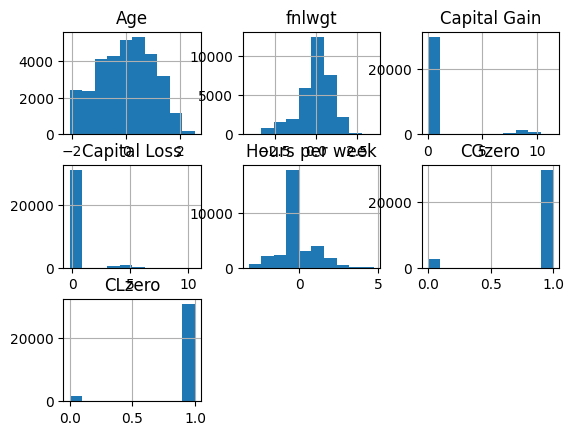

In [ ]:
import matplotlib.pyplot as plt
plt.figure (figsize=(15,30))
adult.hist()

In [ ]:
numCols = adult.columns[adult.dtypes != 'category']
numCols

Index(['Age', 'fnlwgt', 'Capital Gain', 'Capital Loss', 'Hours per week',
       'CGzero', 'CLzero'],
      dtype='object')

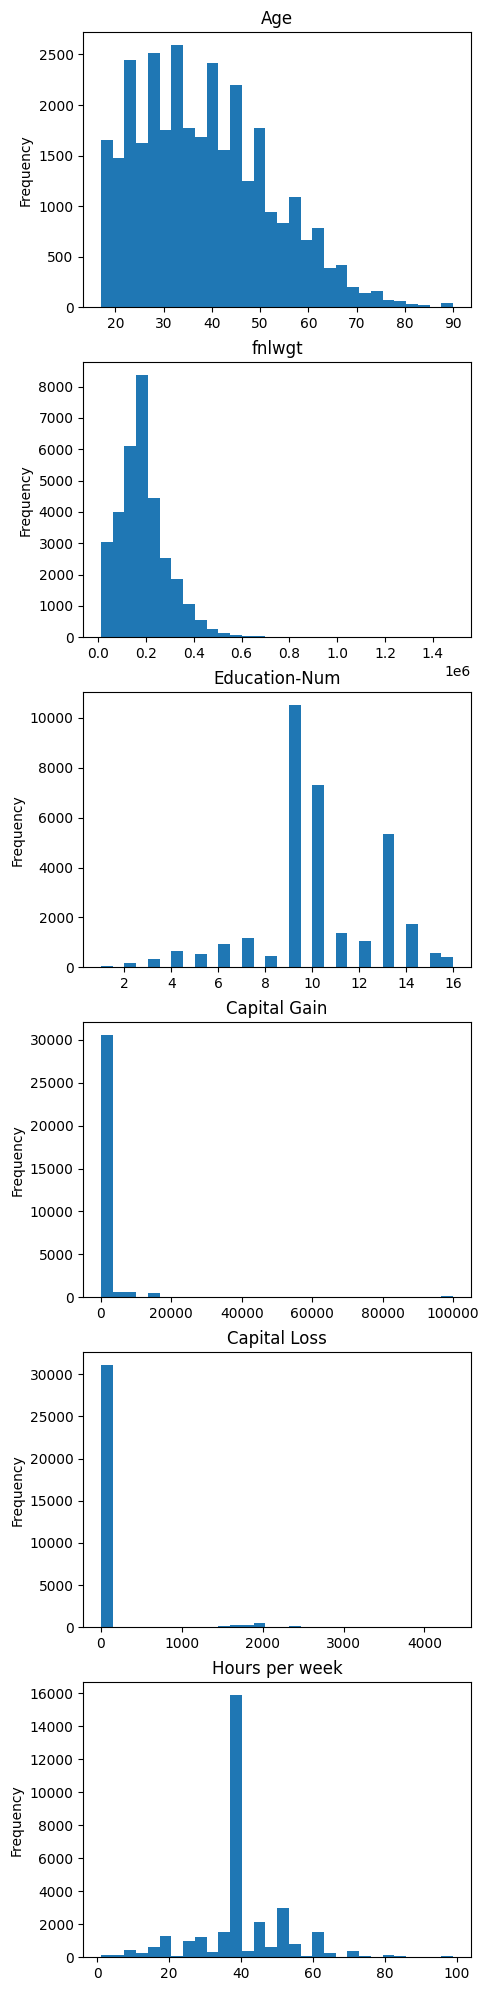

In [ ]:
# plt.subplots(nrow, ncol, figsize=(x, y))
fig, axes = plt.subplots(numCols.size, 1, figsize=(5, 25))
axes = axes.ravel()
for i, colm in enumerate(numCols):
    adult[colm].plot.hist(bins=30, ax = axes[i])
    axes[i].set_title(colm)


    #fnlwgt를 보면 1.4에는 값이 없는데 없는게 아니고 있다. 근데 값이 작아서 안 보일뿐이다.
    #너무 값이 작아서 안 보이는 값은 log변환 -> 그럼 종모양의 분포로 보임

(0.0, 100.0)

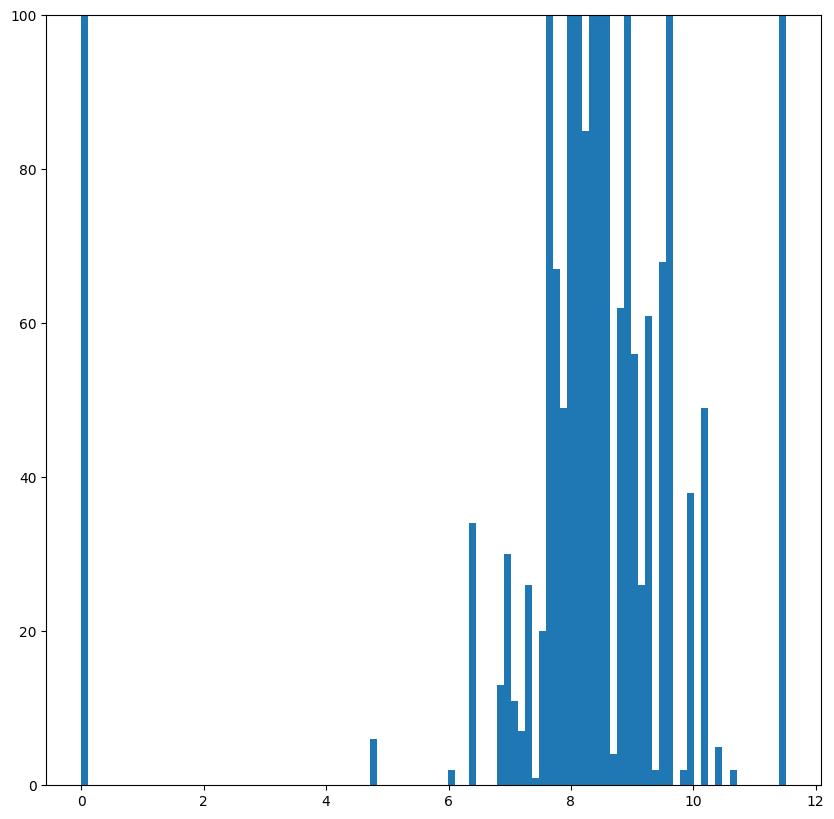

In [ ]:
fig = plt.figure(figsize=(10, 10))
plt.hist(adult['Capital Gain'], bins=100)# bins=100은 100개의 구간으로 쪼갠다는 뜻
plt.ylim(0, 100)

In [ ]:
CGbins = pd.cut(adult['Capital Gain'], bins=100).value_counts().sort_index()
print(CGbins)

(-0.0115, 0.115]    29849
(0.115, 0.23]           0
(0.23, 0.345]           0
(0.345, 0.461]          0
(0.461, 0.576]          0
                    ...  
(10.937, 11.052]        0
(11.052, 11.168]        0
(11.168, 11.283]        0
(11.283, 11.398]        0
(11.398, 11.513]      159
Name: Capital Gain, Length: 100, dtype: int64


In [ ]:
CGbins[-20:]

(79999.2, 80999.19]       0
(80999.19, 81999.18]      0
(81999.18, 82999.17]      0
(82999.17, 83999.16]      0
(83999.16, 84999.15]      0
(84999.15, 85999.14]      0
(85999.14, 86999.13]      0
(86999.13, 87999.12]      0
(87999.12, 88999.11]      0
(88999.11, 89999.1]       0
(89999.1, 90999.09]       0
(90999.09, 91999.08]      0
(91999.08, 92999.07]      0
(92999.07, 93999.06]      0
(93999.06, 94999.05]      0
(94999.05, 95999.04]      0
(95999.04, 96999.03]      0
(96999.03, 97999.02]      0
(97999.02, 98999.01]      0
(98999.01, 99999.0]     159
Name: Capital Gain, dtype: int64

Capital Gain의 99999는 결측값에 대한 기록으로 판단된다. 이 데이터를 어떻게 할꺼냐?
1. 테스트 데이터에서 Capital Gain이 99999인 데이터가 없다면, 과감히 제거할 수 있다. <- 가장 편한방법이다. 그러나 모델이 부정확할 수 있다.
2. 단순한 방법은 99999를 제외한 데이터의 median 또는 mean으로 대체
3. 선형회귀 모델을 만들어서, 대체하는 방법 <- 수고스러움 그러나 정확해

1번 항목을 검토해보자.

In [ ]:
adultst = pd.read_csv(test_url, names=features)
adultst[adultst['Capital Gain'] == 99999].size
#결과가 1275이다. -> 제거하면 안된다는 뜻

1275

[Quiz] Capital Loss: 1000을 기준으로 데이터를 나누고
- histogram을 다시 그려보고
- 필요시 1000> 여부를 갖는 파생변수 생성 필요

In [ ]:
#1000에 데이터가 밀집되어 있으니까 1000을 기준으로 데이터를 나눠보는건 어떨까?
cl1kl = adult['Capital Loss'][adult['Capital Loss'] <= 1000]
cl1ku = adult['Capital Loss'][adult['Capital Loss'] > 1000]

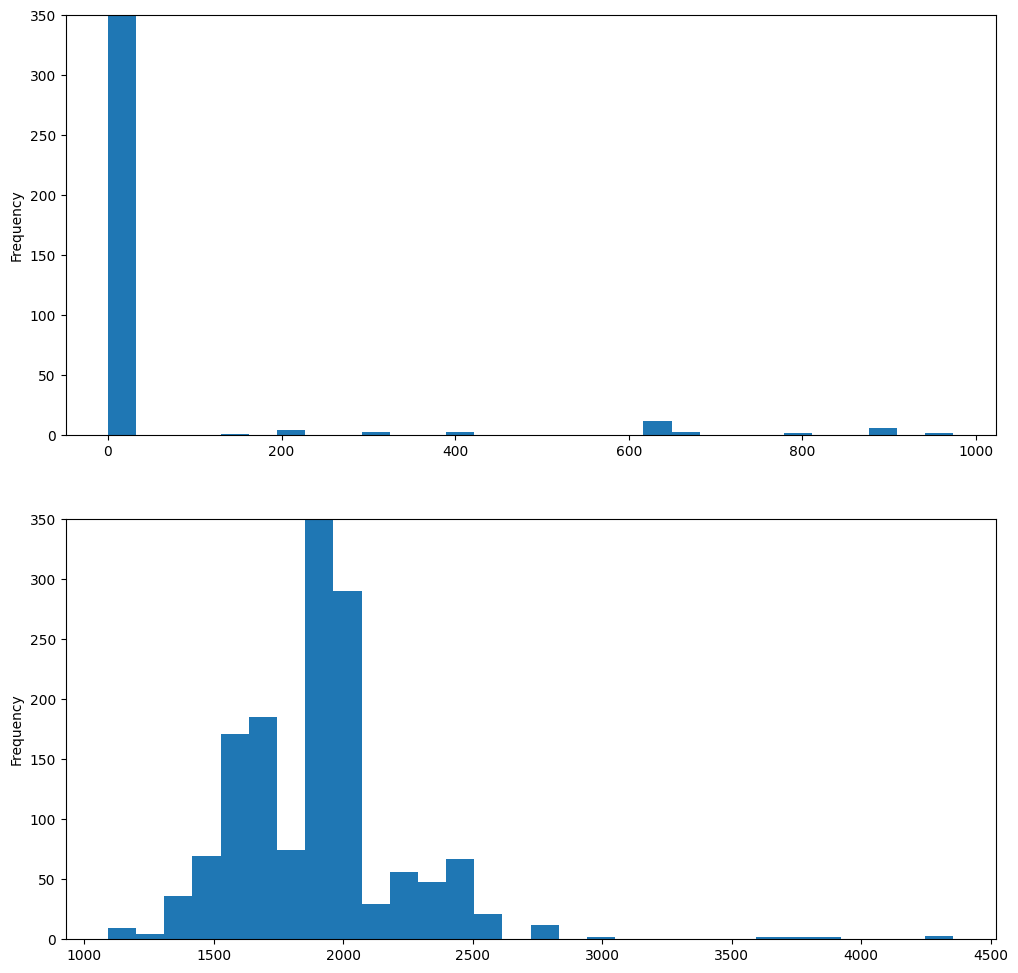

In [ ]:
fig, axes = plt.subplots(2, 1, figsize=(12, 12))
axes = axes.ravel()
for ax, s in zip(axes, [cl1kl, cl1ku]):
    ax.set_ylim(0, 350)
    s.plot.hist(bins=30, ax=ax)

    #그래프를 보면 30이하인게 대부분이다.

- 0을 제외하면 좌우 대칭의 종모양의 분포를 가지고 있다.
- 지나치게 많은 0의 데이터는 특이성을 보이는 데이터로 보고, 0 여부의 파생변수를 생성하는 것이 맞겠다.

### 4) 데이터 전처리
- 연속형 변수 : scaling
- 범주형 변수 : one-hot encoding

#### 데이터 정규화 : log 변환
연속형 변수들이 Hours per week 변수를 제외하곤, light-skewed한 데이터이다. 머신러닝의 기본 가정으로 통계적인 가설에 따라 입력데이는 정규분포를 가정하고 있다.

이를 지원하기 위해 log 변환이 필요하다.

+) log변환시 제일 중요한 것 -> 음수가 있나 없나?
+) 0인 데이터는 1p변환해주기 -> 1을 더해주는 것이다.

In [ ]:
arr = np.array([1,5,8,3,6])
#np.where(arr>3) #뜻: arr에서 3보다 큰 값의 위치는 어디에 있찌? 만족하는 값의 index를 return해준다.
#실제로 3보다 큰 값을 취하는 것
o3idx = np.where(arr>3)[0]
arr[o3idx]

array([5, 8, 6])

In [ ]:
CG99999Idx = np.where(adult['Capital Gain'] == 99999)[0]

In [ ]:
numCols

Index(['Age', 'fnlwgt', 'Education-Num', 'Capital Gain', 'Capital Loss',
       'Hours per week'],
      dtype='object')

In [ ]:
for colm in ['Age', 'fnlwgt', 'Capital Gain']:
    adult[colm] = np.log1p(adult[colm])
adult.describe()

,Age,fnlwgt,Education-Num,Capital Gain,Capital Loss,Hours per week
count,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,3.618360,11.983778,10.080679,0.734621,87.303830,40.437456
std,0.350031,0.630738,2.572720,2.454738,402.960219,12.347429
min,2.890372,9.416216,1.000000,0.000000,0.000000,1.000000
25%,3.367296,11.676981,9.000000,0.000000,0.000000,40.000000
50%,3.637586,12.091542,10.000000,0.000000,0.000000,40.000000
75%,3.891820,12.376035,12.000000,0.000000,0.000000,45.000000
max,4.510860,14.210727,16.000000,11.512925,4356.000000,99.000000


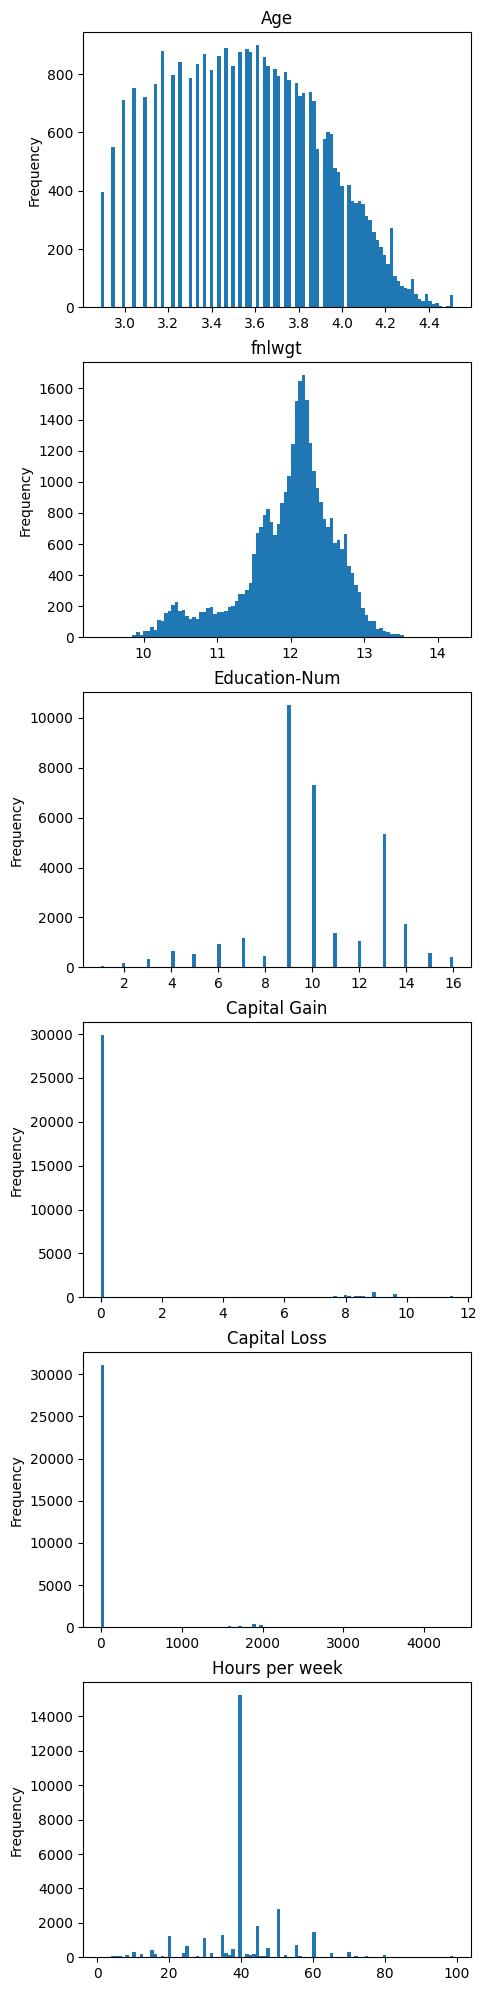

In [ ]:
fig, axes = plt.subplots(numCols.size, 1, figsize=(5, 25))
axes = axes.ravel()
for i, colm in enumerate(numCols):
    adult[colm].plot.hist(bins=100, ax = axes[i])
    axes[i].set_title(colm)

<Axes: ylabel='Frequency'>

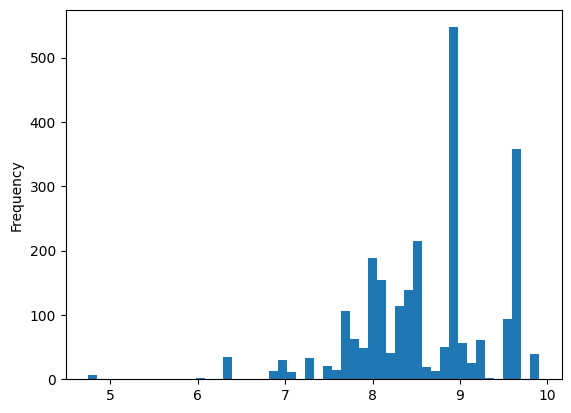

In [ ]:
adult['Capital Gain'][(adult['Capital Gain'] <= 10) & (adult['Capital Gain'] > 0)].plot.hist(bins=50)

- Capital Gain은 오히려 log 변환을 하지 않는 것이 더 좋을 뻔 했다.

In [ ]:
print(adult.shape)
print((adult['Capital Gain'] == 0).sum())
print((adult['Capital Loss'] == 0).sum())

(32561, 15)
29849
31042


#### 파생변수의 생성
Capital Gain과 Capital Loss에 지나치게 많은 0 값을 별도의 특징으로 변환시키자

In [ ]:
adult['CGzero'] = np.where(adult['Capital Gain'] == 0, 1, 0)
adult['CLzero'] = np.where(adult['Capital Loss'] == 0, 1, 0)

#### 연속형 변수의 scaling
3가지 Scaling 방법이 존재
- MinMaxScaler : [0, 1] 변환
- StandardScaler: 평균 0, 표준편차를 1로 변환시킨다.
- RobustScaler: 중위수 0, IQR을 1로 변환시킨다.

In [ ]:
# from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler //이건 전부 class들이다. (대문자로 시작하니까)
adultStat = adult.describe()
IQR = adultStat.loc['75%'] - adultStat.loc['25%']
IQR.name = 'IQR'
adultStat = adultStat.append(IQR)
adultStat

<ipython-input-581-afde8f2ae092>:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  adultStat = adultStat.append(IQR)


,Age,fnlwgt,Education-Num,Capital Gain,Capital Loss,Hours per week,CGzero,CLzero
count,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,3.618360,11.983778,10.080679,0.734621,87.303830,40.437456,0.916710,0.953349
std,0.350031,0.630738,2.572720,2.454738,402.960219,12.347429,0.276324,0.210893
min,2.890372,9.416216,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,3.367296,11.676981,9.000000,0.000000,0.000000,40.000000,1.000000,1.000000
50%,3.637586,12.091542,10.000000,0.000000,0.000000,40.000000,1.000000,1.000000
75%,3.891820,12.376035,12.000000,0.000000,0.000000,45.000000,1.000000,1.000000
max,4.510860,14.210727,16.000000,11.512925,4356.000000,99.000000,1.000000,1.000000
IQR,0.524524,0.699054,3.000000,0.000000,0.000000,5.000000,0.000000,0.000000


스케일링을 할 것인데:
1. 다른 변수는 결측치가 없어서 바로 학습하고 변환하면 된다.
2. CG은 결측치가 있으므로, 결측치를 제외하고 학습하여 변환한다.
 - 결측치는 향후 다른 방법으로 대체한다.

In [ ]:
firstScaleCols = ['Age', 'fnlwgt', 'Capital Loss', 'Hours per week']
SecondScaleCols = ['Capital Gain']

In [ ]:
numCols

Index(['Age', 'fnlwgt', 'Education-Num', 'Capital Gain', 'Capital Loss',
       'Hours per week'],
      dtype='object')

In [ ]:
# 위에 보면, CL에 IRQ이 0이라서, RobustScaler를 사용하지 않는 것이 좋다.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(adult[firstScaleCols])
adult[firstScaleCols] = scaler.transform(adult[firstScaleCols])

In [ ]:
CGno99999Idx = adult.index.drop(CG99999Idx)

In [ ]:
scaler = StandardScaler().fit(adult[SecondScaleCols].loc[CGno99999Idx]) #99999가 아닌 데이터만 학습시키기
adult[SecondScaleCols].loc[CGno99999Idx] = scaler.transform(adult[SecondScaleCols].loc[CGno99999Idx])

<ipython-input-586-85b3daed3c4a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adult[SecondScaleCols].loc[CGno99999Idx] = scaler.transform(adult[SecondScaleCols].loc[CGno99999Idx])


스케일러 이해를 위한 샘플 코드


In [ ]:
arr

array([1, 5, 8, 3, 6])

In [ ]:
#sc = StandardScaler().fit(arr) #항상 입력데이터가 2차원이라는 가정을 하기 때문에 이 줄은 틀림
sc = StandardScaler().fit(arr.reshape((-1,1))) #그래서 차원 바꾸기 reshape하기
sced = sc.transform(arr.reshape((-1,1)))
pd.DataFrame({'orig':arr, 'scaled':sced[:,0]})

,orig,scaled
0,1,-1.489691
1,5,0.165521
2,8,1.406930
3,3,-0.662085
4,6,0.579324


In [ ]:
sced.mean(), sced.std()
#~~e-16승은 0이라고 보면 된다. 아주 작은 값

(1.9984014443252818e-16, 1.0)

#### 범주형 데이터의 one-hot encoding

In [ ]:
tmp = pd.DataFrame({
    'a':list("ABBAC"),
    'b':[1,0,1,0,2],
    'c':list("MMFFM")
})
tmp

,a,b,c
0,A,1,M
1,B,0,M
2,B,1,F
3,A,0,F
4,C,2,M


In [ ]:
pd.get_dummies(tmp, drop_first=True)

,b,a_B,a_C,c_M
0,1,0,0,1
1,0,1,0,1
2,1,1,0,0
3,0,0,0,0
4,2,0,1,1


In [ ]:
adult.drop('Education-Num', axis=1, inplace=True)

In [ ]:
prepped = pd.get_dummies(adult, drop_first=True, sparse=False)
prepped

,Age,fnlwgt,Capital Gain,Capital Loss,Hours per week,CGzero,CLzero,Workclass_ Federal-gov,Workclass_ Local-gov,Workclass_ Never-worked,...,Country_ Puerto-Rico,Country_ Scotland,Country_ South,Country_ Taiwan,Country_ Thailand,Country_ Trinadad&Tobago,Country_ United-States,Country_ Vietnam,Country_ Yugoslavia,Target_ >50K
0,0.201470,-1.150298,7.684784,-0.21666,-0.035429,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0.895550,-1.035993,0.000000,-0.21666,-2.222153,1,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0.129138,0.471867,0.000000,-0.21666,-0.035429,1,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,1.058848,0.606250,0.000000,-0.21666,-0.035429,1,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,-0.717273,1.186304,0.000000,-0.21666,-0.035429,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,-0.817527,0.751879,0.000000,-0.21666,-0.197409,1,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
32557,0.272015,-0.058088,0.000000,-0.21666,-0.035429,1,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
32558,1.311839,-0.083598,0.000000,-0.21666,-0.035429,1,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
32559,-1.379515,0.364217,0.000000,-0.21666,-1.655225,1,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [ ]:
print(prepped.columns)

Index(['Age', 'fnlwgt', 'Capital Gain', 'Capital Loss', 'Hours per week',
       'CGzero', 'CLzero', 'Workclass_ Federal-gov', 'Workclass_ Local-gov',
       'Workclass_ Never-worked',
       ...
       'Country_ Puerto-Rico', 'Country_ Scotland', 'Country_ South',
       'Country_ Taiwan', 'Country_ Thailand', 'Country_ Trinadad&Tobago',
       'Country_ United-States', 'Country_ Vietnam', 'Country_ Yugoslavia',
       'Target_ >50K'],
      dtype='object', length=102)


### 5) 결측 데이터 처리하기
train 데이터에서 결측으로 예상되는 데이터가 159개, 테스트 데이터에서는 1275개이므로, 단순 제거는 올바른 방법이 아니다.

회귀 모델을 만들어서 결측처리 하도록 하겠습니다.
1. 전체 데이터에서 CG99999Idx 행들과 target열을 뺀 trainCG를 생성
2. 전체 데이터에서 CG99999Idx 행들을 포함하고 target열을 뺀 testCG를 생성
3. trainCG에서 Capital Gain을 타겟으로 LinearRegression 모델을 학습하고,
4. testCG에 있는 Capital Gain을 예측하여, 이 값으로 prepped 데이터 CG99999Idx 행들의 Capital Gain의 값을 대체한다.

In [ ]:
allIdx = np.arange(32561)
allIdx

array([    0,     1,     2, ..., 32558, 32559, 32560])

In [ ]:
np.setdiff1d(np.arange(5), np.arange(3)) #setdiff1d( A,B) 집합연산, A에서 B를 뺀 차집합
#전체 index에서 9999가 들어간 index를 빼줌 <- 결측치 처리

array([3, 4])

In [ ]:
trainIdx = np.setdiff1d(allIdx, CG99999Idx, assume_unique=True)

In [ ]:
trainCG = prepped.iloc[trainIdx].drop('Target_ >50K', axis=1)
trainCG.head()

,Age,fnlwgt,Capital Gain,Capital Loss,Hours per week,CGzero,CLzero,Workclass_ Federal-gov,Workclass_ Local-gov,Workclass_ Never-worked,...,Country_ Portugal,Country_ Puerto-Rico,Country_ Scotland,Country_ South,Country_ Taiwan,Country_ Thailand,Country_ Trinadad&Tobago,Country_ United-States,Country_ Vietnam,Country_ Yugoslavia
0,0.201470,-1.150298,7.684784,-0.21666,-0.035429,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0.895550,-1.035993,0.000000,-0.21666,-2.222153,1,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0.129138,0.471867,0.000000,-0.21666,-0.035429,1,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,1.058848,0.606250,0.000000,-0.21666,-0.035429,1,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,-0.717273,1.186304,0.000000,-0.21666,-0.035429,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
Xtr, ytr = trainCG.drop('Capital Gain', axis=1), trainCG['Capital Gain']

In [ ]:
testCG = prepped.iloc[CG99999Idx].drop('Target_ >50K', axis=1)
Xts = testCG.drop('Capital Gain', axis=1)

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression().fit(Xtr, ytr)
CGpreds = lr.predict(Xts)
CGpreds

array([8.83296632, 8.63230266, 8.6791315 , 8.69844913, 8.7890458 ,
       8.70209169, 8.66846677, 8.67045879, 8.58843983, 8.6927266 ,
       8.73127555, 8.7774105 , 8.76626491, 8.78093528, 8.76724838,
       8.78003692, 8.81522512, 8.65752649, 8.65426826, 8.72678637,
       8.62279662, 8.76750039, 8.82894706, 8.75930949, 8.79101133,
       8.83386802, 8.71548911, 8.67168593, 8.64701422, 8.75968408,
       8.77557122, 8.72654246, 8.62391599, 8.73073839, 8.61446094,
       8.62972449, 8.78953504, 8.61934613, 8.72890591, 8.63074874,
       8.83396011, 8.68843555, 8.73480605, 8.66480827, 8.67118501,
       8.76348304, 8.61978625, 8.67595243, 8.70639669, 8.73307895,
       8.61966991, 8.62173148, 8.79288673, 8.77754044, 8.65425157,
       8.69202136, 8.63121199, 8.82908439, 8.62614759, 8.65863179,
       8.68415736, 8.75895261, 8.57360085, 8.62969124, 8.67050122,
       8.67039298, 8.71762919, 8.78959178, 8.83233737, 8.73509597,
       8.65970706, 8.71310209, 8.78967952, 8.70094346, 8.67115

In [ ]:
CGpreds.shape

(159,)

In [ ]:
prepped.loc[CG99999Idx, 'Capital Gain'] = CGpreds

## 5. 모델 생성

In [ ]:
from sklearn.linear_model import LogisticRegression #분류모델에 쓰이는 import들
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV #탐색하는 역할

In [ ]:
params1 = {'C':[0.001, .01, .1, 1, 10, 100]} #C값을 0.001부터 100까지 탐색
params2 = {'max_depth':range(3, 10)}
logreg = LogisticRegression(max_iter=1000, n_jobs=-1)#logreg라는 인스턴스임(클래스로 생성했으니)
#max_iter=1000은 학습을 반복할껀데 1000번까지 반복해 , n_jobs=-1은 cpu를 몽땅 써라. n_jobs=1은 코어 1개 써라, 2개는 코어 2개 써라, 4개는 코어 4개 써라. -1은 모든 코어를 써라
rf = RandomForestClassifier(n_jobs=-1)
X, y = prepped.drop('Target_ >50K', axis=1), prepped['Target_ >50K']

grid1 = GridSearchCV(logreg, params1, n_jobs=-1) #CV의 의미는 Cross
grid2 = GridSearchCV(rf, params2, n_jobs=-1)
grid1.fit(X, y); grid2.fit(X, y) #그리드 1,2학습시켜
grid1, grid2


#결과를 보니 C값은 10일 때 젤 좋음, 근데 5일때 가장 좋을수도있고 50일때 가장 좋을수도 있다.
#여기서 정확도를 더 올리고 싶으면 그 근처 데이터를 다시 탐색해주기

(GridSearchCV(estimator=LogisticRegression(max_iter=1000, n_jobs=-1), n_jobs=-1,
              param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100]}),
 GridSearchCV(estimator=RandomForestClassifier(n_jobs=-1), n_jobs=-1,
              param_grid={'max_depth': range(3, 10)}))

In [ ]:
print(grid1.best_params_)
print(grid1.best_score_)
print(grid2.best_params_)
print(grid2.best_score_)

{'C': 10}
0.8546728740591018
{'max_depth': 9}
0.8541814547054069


In [ ]:
pd.DataFrame(grid1.cv_results_).T

#split0~4까지 -> 데이터를 5개로 쪼갠다고 했으니까
#c:10인 곳의 오른쪽을 탐색하기(=더 가능성 있는 쪽으로 탐색하기)

,0,1,2,3,4,5
mean_fit_time,0.293579,0.584269,1.357797,3.780439,5.442727,7.484848
std_fit_time,0.018664,0.048676,0.106595,0.861305,0.394853,1.148778
mean_score_time,0.009299,0.007694,0.00767,0.008385,0.013547,0.006615
std_score_time,0.001942,0.00014,0.000108,0.00196,0.007812,0.001073
param_C,0.001,0.01,0.1,1,10,100
params,{'C': 0.001},{'C': 0.01},{'C': 0.1},{'C': 1},{'C': 10},{'C': 100}
split0_test_score,0.81606,0.839705,0.843544,0.84815,0.851221,0.85076
split1_test_score,0.809889,0.84137,0.843673,0.848434,0.849355,0.848894
split2_test_score,0.819564,0.844902,0.848587,0.853808,0.856572,0.85734
split3_test_score,0.809736,0.842445,0.851198,0.856726,0.859337,0.859337


In [ ]:
params2 = {'max_depth':range(9, 15)}
grid2 = GridSearchCV(rf, params2, n_jobs=-1)
grid1.fit(X, y); grid2.fit(X, y)

#14일 때 가장 좋다고 함...

GridSearchCV(estimator=RandomForestClassifier(n_jobs=-1), n_jobs=-1,
             param_grid={'max_depth': range(9, 15)})

In [ ]:
pd.DataFrame(grid2.cv_results_).T

,0,1,2,3,4,5
mean_fit_time,4.063827,3.68974,3.879687,4.032018,3.567877,4.264836
std_fit_time,0.558662,0.776293,0.712038,1.047835,0.155654,0.8676
mean_score_time,0.234037,0.165836,0.20271,0.187129,0.195793,0.182126
std_score_time,0.026645,0.028174,0.056521,0.038009,0.045538,0.059641
param_max_depth,9,10,11,12,13,14
params,{'max_depth': 9},{'max_depth': 10},{'max_depth': 11},{'max_depth': 12},{'max_depth': 13},{'max_depth': 14}
split0_test_score,0.849839,0.854291,0.857669,0.856134,0.855673,0.857823
split1_test_score,0.853041,0.853655,0.855958,0.857033,0.856572,0.856419
split2_test_score,0.853194,0.858108,0.857494,0.858722,0.859337,0.863943
split3_test_score,0.853194,0.856726,0.859029,0.858262,0.85949,0.859951


[Quiz] <br>
excel_exam.xlsx 파일을 이용하여 반별 과목별 평균을 구하고, 반별 과목별로 전체 과목 평균보다 낮은 학생 id를 순서대로 출력하라.


| class | math | english | science |
|-------|------|---------|---------|
| 1     | 2    | 1       | 3       |
| 1     | 1    | 4       | NaN     |
| 1     | NaN  | 2       | NaN     |
| 2     | 8    | 7       | 6       |
| 2     | 7    | 6       | 5       |

- 평균보다 높은 학생의 수는 절반일 수도, 그 보다 높거나, 낮을 수 있다.

In [ ]:
from google.colab import drive
import os
drive.mount('/content/drive/')
os.chdir('/content/drive/My Drive/Colab Notebooks/DataAnal')
!pwd

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


FileNotFoundError: ignored

In [ ]:
import pandas as pd
df = pd.read_excel("./excel_exam.xlsx")
df.head()

In [ ]:
meanscores = df.iloc[:, 1:].groupby('class').mean()
meanscores

In [ ]:
tm = df.copy().set_index('class')
tm.head()

In [ ]:
tm.iloc[:, 1:] = tm.iloc[:, 1:] - meanscores
tm.head()

In [ ]:
np.where(tm.math > 0, np.nan, tm.id)

In [ ]:
f = lambda x: np.where(x > 0, np.nan, tm.id)

In [ ]:
f(tm.math)

In [ ]:
tm.iloc[:, 1:].transform(f)

[Quiz] 위 결과에서 :
- 반별 저점자 순으로 정렬하고,
- 모두 결측치인 행은 제거하여

좀 더 스마트한 보고서를 제출해보자.

In [ ]:
tm

In [ ]:
TM = tm.copy()
TM

In [ ]:
# tm = tm.iloc[:, 1:].transform(f)
# tm

In [ ]:
tmp = tm.reset_index().set_index(['class', 'id'])
groups = tmp.groupby(level=0)

In [ ]:
ranking = lambda x: x.rank(method="first")
int32 = lambda x: x.astype('int32')
ranks = groups.apply(ranking).apply(int32)
ranks

In [ ]:
underMean = tm.iloc[:, 1:] < 0
underMean = underMean.astype('bool')
underMean

In [ ]:
subjs = tm.columns[1:]
subjs

In [ ]:
underMeandf = tm.copy()
underMeandf[subjs] = underMean
underMeandf

In [ ]:
tm[subjs] = tm[subjs].apply(lambda x: tm.id)
tm

In [ ]:
tm[subjs] = tm[subjs][underMean]
tm

In [ ]:
tm = tm.reset_index().set_index(['class', 'id'])
tm

In [ ]:
def sort_by_rank(mgroup, subj):
    sort_col = '%s_r' % subj
    tmp = mgroup.sort_values(by=sort_col)
    tmp.index = [cls]*tmp.shape[0]
    return tmp[[subj]]

In [ ]:
lastlist = []
for subj in subjs:
    merged = ranks[[subj]].join(tm[[subj]], lsuffix='_r')
    megroups = merged.groupby(level=0)
    intermediate = []
    for cls, group in megroups:
        subj_tmp = sort_by_rank(group, subj)
        intermediate.append(subj_tmp)
    class_tmp = pd.concat(intermediate)
    lastlist.append(class_tmp)
last = pd.concat(lastlist, axis=1)
last.dropna(how='all')

In [ ]:
for k , g in megroups:
    print(g)

[Excercise]
seaborn의 titanic 데이터를 이용하여,
1. EDA를 통해, 중복데이터, 이상치, 결측치를 식별하고
2. 중복데이터를 제거
3. 이상치, 결측치를 적당한 값으로 대체하여
4. 타겟인 survived에 대한 예측 모델을 생성하자.
 - 모델은 이전에 배운 DecisionTreeClassifier와 다른 것을 사용해도 좋다.

In [ ]:
import seaborn as sns

In [ ]:
titanic = sns.load_dataset('titanic')
titanic.head()

In [ ]:
titanic.info()